# Price of Household Energy Consumption Investigation - AOC G00364756

## Date created: 18/11/2018

### Introduction¶
This is a project tasked to students of the Data Analytics Higher Diploma as delivered by Dr. Ian McGloughlin and provided by GMIT. The objective of this project is to research a phenomenon that is dependant on 3 variables and simulate a dataset using the "numpy.random" python package to demonstrate that students can use this package profficiently. This will be done through use of a Jupyter Notebook and Python with the aim of demonstrating how the functions operate in a clear and engaging format. A clear history of the work conducted in this project will be available on the Github repository "52465---Programming-for-Data-Analysis---Project" submitted to the "Programming for Data Analysis" GMIT moodle page. All works drawn upon to aid in the creation of this submission will be referenced within the "References" section of this Jupyter Notebook (please see the table of contents). The due date for this assignment is the 14/12/2018.

## Contents
1. Problem statement
2. Choosing a real world phenomenon to simulate
3. Investigating the types of variables involved
    * Likely Distributions
     - (insert distributions)
 
    * Relationships of the variables
     - (insert subsections)

4. Synthesising the data set as colsely matching their properties as possible
    * (insert subsections)

5. References


## 1. Problem statement
Below is the problem statement from the project pdf file:

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
3. Synthesise/simulate a data set as closely matching their properties as possible.
4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.

## 2. Choosing a Real World Phenomenon
Chosen real world phenomenon to be investigated:-

Price of Energy Consumption for a household over a given timeframe.
* Variable 1: Fuel type (Categorical variable) - 4 types Heating Oil, Natural Gas, LPG and Biomass
* Variable 2: Price of fuel (varies with time for each type of fuel) - 4 different variable prices for each fuel source
* Variable 3: Heat necessary to warm the house - Investigate the relationship between the amount of heat released by the combustion of each fuel type.
* Variable 4: Degree Days - The average temperature of each day will affect the amount of energy needed to heat the domicile

[1](https://www.seai.ie/resources/publications/Domestic-Fuel-Cost-Comparison.pdf) : SEAI - Domestic Fuel Cost Comparison Oct 2018 : See References

[2](https://www.seai.ie/resources/publications/Domestic-Fuel-Cost-Archives.pdf) : SEAI - Domestic Fuel Cost Comparison Archive : See References

[3](https://www.degreedays.net/introduction) : DegreeDays.net - Explaination od Degree Days and heating degree day data

[4](https://www.bonkers.ie/guides/gas-electricity/national-average-energy-consumption/) : Bonkers.ie - Average Irish household gas consumption

## 3. Investigating the types of variables involved

There are 4 variables which will be considered as part of this project.

* Variable 1: Fuel type 
There are many different types of fuels that can be used to heat a domestic home. A breakdown of the type of fuel and cost of that fuel per unit can be obtained from the Sustainable Energy Authority of Ireland's (SEAI) website. For this project the focus will be on 4 fuel types; Coal, Kerosene, Natural Gas at the standard rate and L.P.G. when purchased in bulk. Fuel type is a categorical/qualitative variable which takes the form of a label or name. https://stattrek.com/statistics/dictionary.aspx?definition=categorical%20variable
https://en.wikipedia.org/wiki/Categorical_variable
* Variable 2: Price of fuel 
The price of fuel varies with the type of fuel. Financial markets, inflation, taxation, etc. tend to dictate the price of fuels causing them to rise year on year. SEAI's breakdown of the price of each fuel type per unit clearly demonstrates the rise in fuel prices year on year with some fluctuation. Each fuel type will vary in price due to different socio-economic needs/events/trends.
* Variable 3: Heat necessary to warm the house 
The heat necessary to warm a house varies with how - Investigate the relationship between the amount of heat released by the combustion of each fuel type.
* Variable 4: Degree Days - The average temperature of each day will affect the amount of energy needed to heat the domicile

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Drop rows with certain texthttps://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
# Rename columns in a pandas dataframe: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df = pd.read_csv("(2001-2018) Domestic-Fuel-Cost-Archives.csv")
newdata = df[['Date','Standard Coal, bulk','Kerosene (schedule)','Natural Gas Standard Rate','Bulk L.P.G.','Electricity General Domestic Rate']][:]
newdata['datetime'] = pd.to_datetime(newdata['Date'])

Coalx = newdata[['Standard Coal, bulk','datetime']]
Coalx.columns = ['Coal', 'Date']
Coal = Coalx[Coalx.Coal != "n/a"]

Kero = newdata[['Kerosene (schedule)','datetime']]
Kero.columns = ['Kerosene', 'Date']
#Kero = Kero[Kero.Kerosene != "n/a"]

NG = newdata[['Natural Gas Standard Rate','datetime']]
NG.columns = ['Natural_Gas', 'Date']
NG = NG[NG.Natural_Gas != "n/a"]

LPG = newdata[['Bulk L.P.G.','datetime']]
LPG.columns = ['LPG', 'Date']
#LPG = LPG[LPG.LPG != "n/a"]

Elec = newdata[['Electricity General Domestic Rate','datetime']]
Elec.columns = ['Electricity', 'Date']
Elec = Elec[Elec.Electricity != "n/a"]

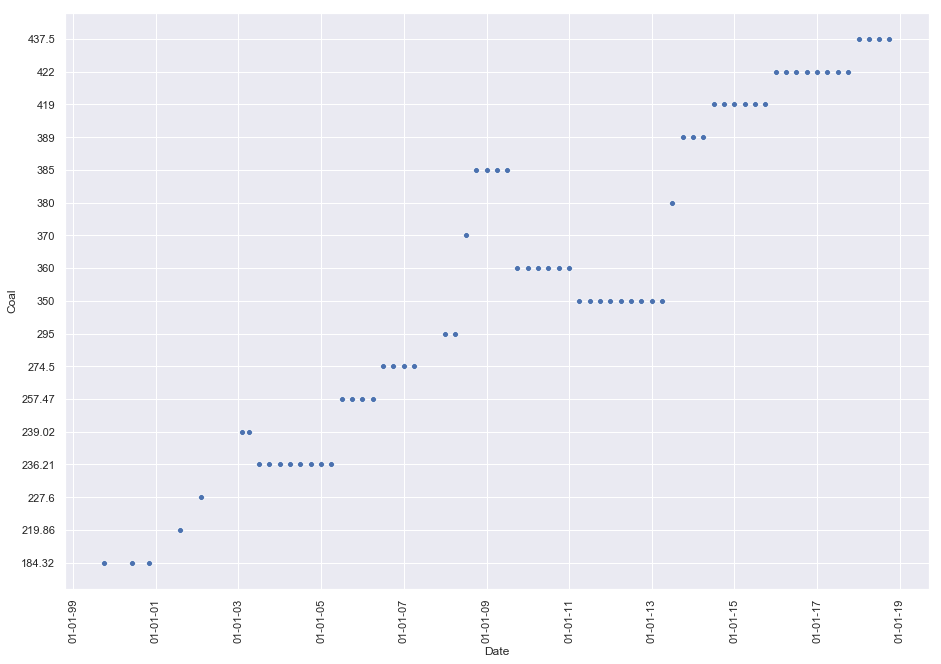

In [3]:
import matplotlib.dates as mdates
sns.set(style="darkgrid")

fig, ax = plt.subplots()
sns.scatterplot(x="Date", y="Coal", data=Coal[1:], ax=ax)

# Makes the x axis display well.
# See: https://stackoverflow.com/a/31262531/340324
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.25, hspace=0.25)
plt.show()

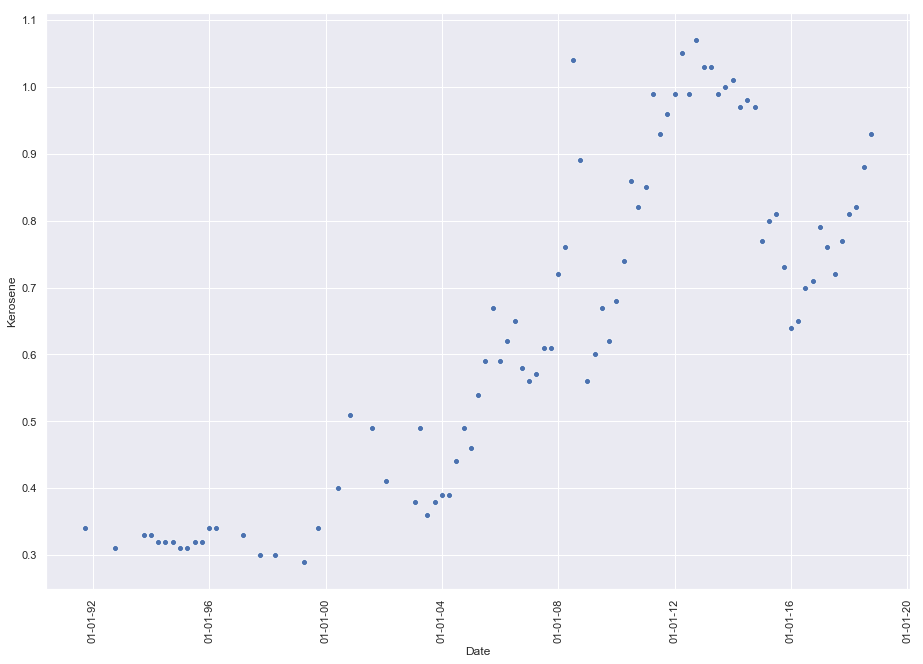

In [4]:
sns.set(style="darkgrid")

fig2, ax = plt.subplots()
sns.scatterplot(x="Date", y="Kerosene", data=Kero[1:], ax=ax)

# Makes the x axis display well.
# See: https://stackoverflow.com/a/31262531/340324
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.25, hspace=0.25)
plt.show()

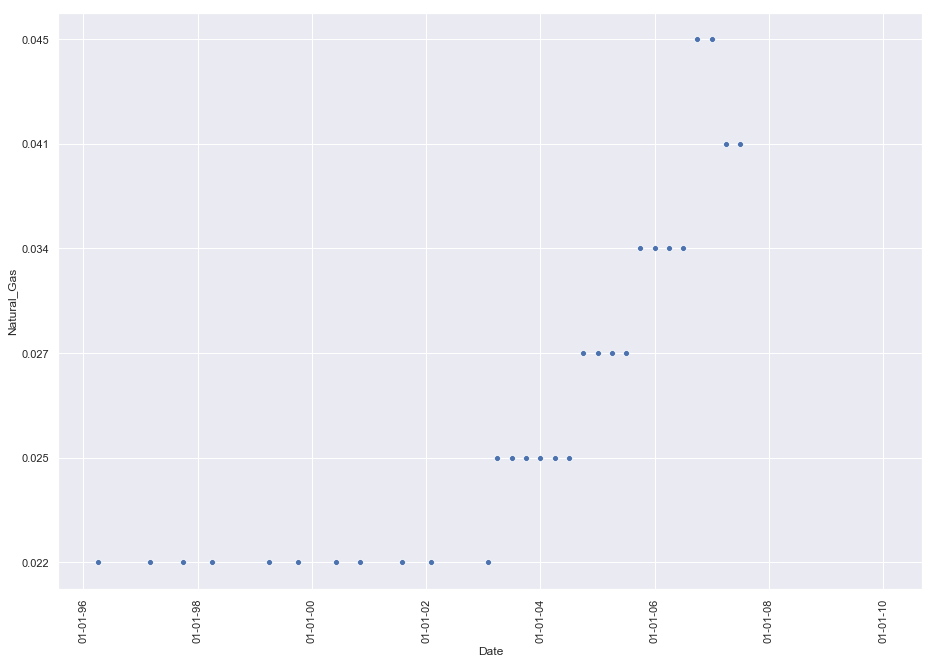

In [5]:
sns.set(style="darkgrid")

fig3, ax = plt.subplots()
sns.scatterplot(x="Date", y="Natural_Gas", data=NG[1:], ax=ax)

# Makes the x axis display well.
# See: https://stackoverflow.com/a/31262531/340324
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.25, hspace=0.25)
plt.show()

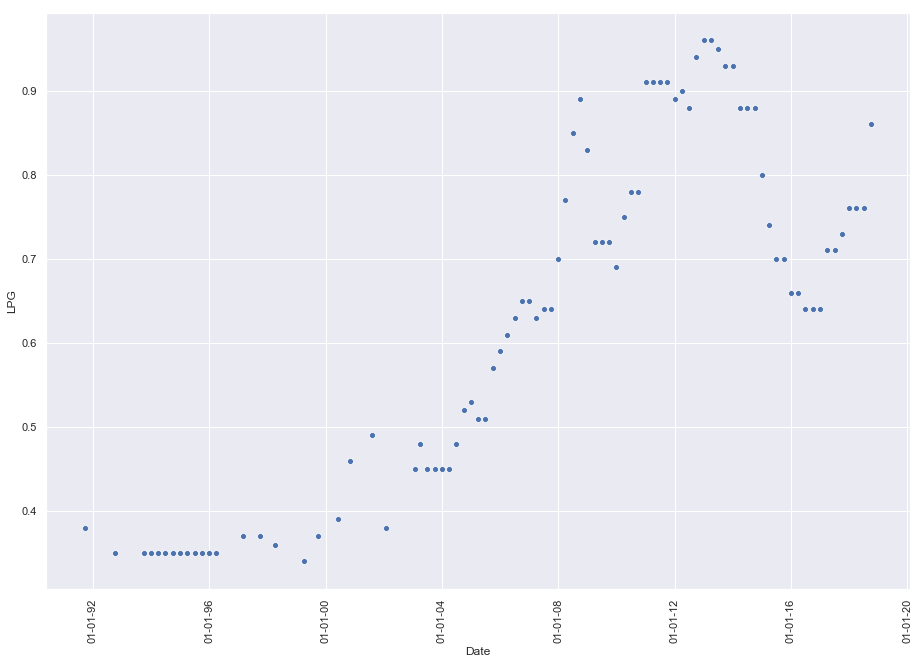

In [6]:
sns.set(style="darkgrid")

fig3, ax = plt.subplots()
sns.scatterplot(x="Date", y="LPG", data=LPG[1:], ax=ax)

# Makes the x axis display well.
# See: https://stackoverflow.com/a/31262531/340324 - Adapted from Dr. Ian McGloughlin's time-series jupyter notebook example
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.25, hspace=0.25)
plt.show()

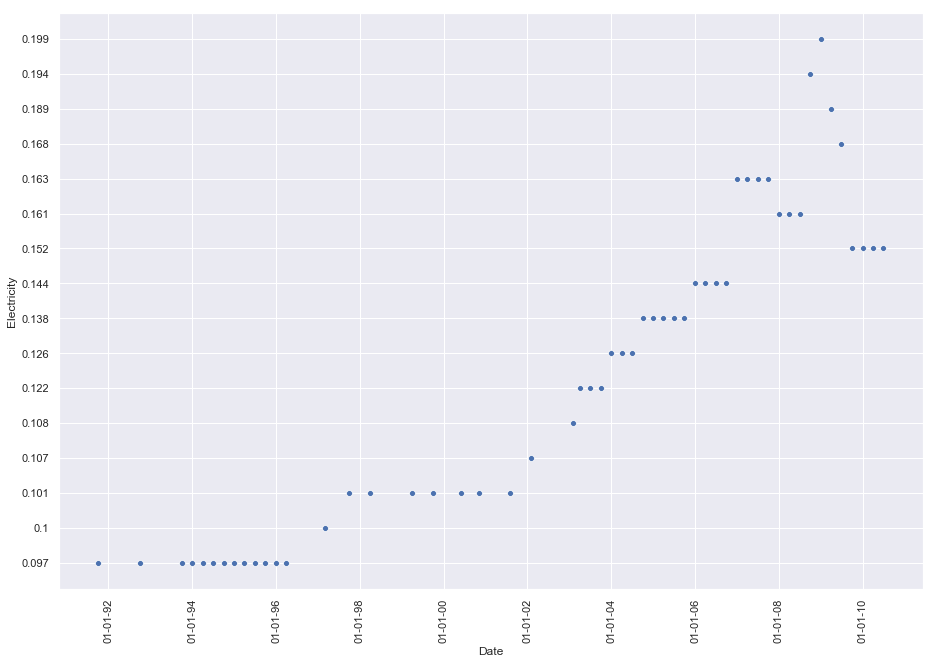

In [7]:
sns.set(style="darkgrid")

fig4, ax = plt.subplots()
sns.scatterplot(x="Date", y="Electricity", data=Elec[1:], ax=ax)

# Makes the x axis display well.
# See: https://stackoverflow.com/a/31262531/340324 - Adapted from Dr. Ian McGloughlin's time-series jupyter notebook example
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.25, hspace=0.25)
plt.show()

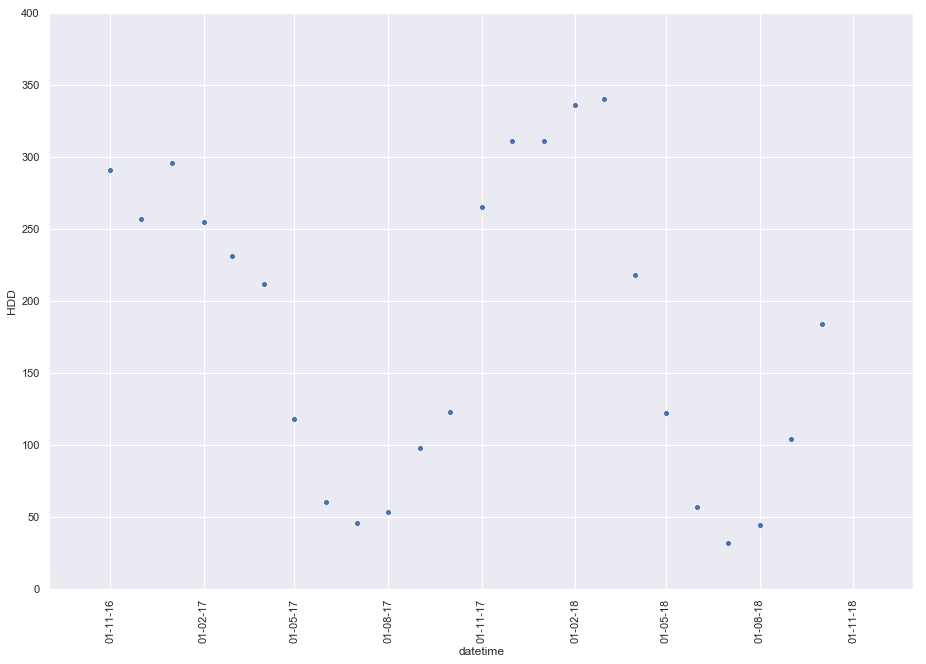

In [18]:
# https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe

import datetime as dt
df1 = pd.read_csv("11_2016_to_10_2018_HDD_15.5C.csv")
newdf1 = df1[['Month starting','HDD','% Estimated']][:]
newdf1['datetime'] = pd.to_datetime(newdf1['Month starting'])
HDD = newdf1[['datetime','HDD']][:]
#DDmin = dt.timedelta(days=90)
#DDmax = dt.timedelta(days=-90)
HDDmin = (HDD["datetime"].iloc[1])
HDDmax = (HDD["datetime"].iloc[-1])
min_val = HDDmin - DDmin
max_val = HDDmax - DDmax
fig5, ax = plt.subplots()
sns.scatterplot(x="datetime", y="HDD", data=HDD[0:], ax=ax)

# Makes the x axis display well.
# See: https://stackoverflow.com/a/31262531/340324 - Adapted from Dr. Ian McGloughlin's time-series jupyter notebook example

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.set_xlim( min_val, max_val )
ax.set_ylim( 0 , 400)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0.25, hspace=0.25)
plt.show()

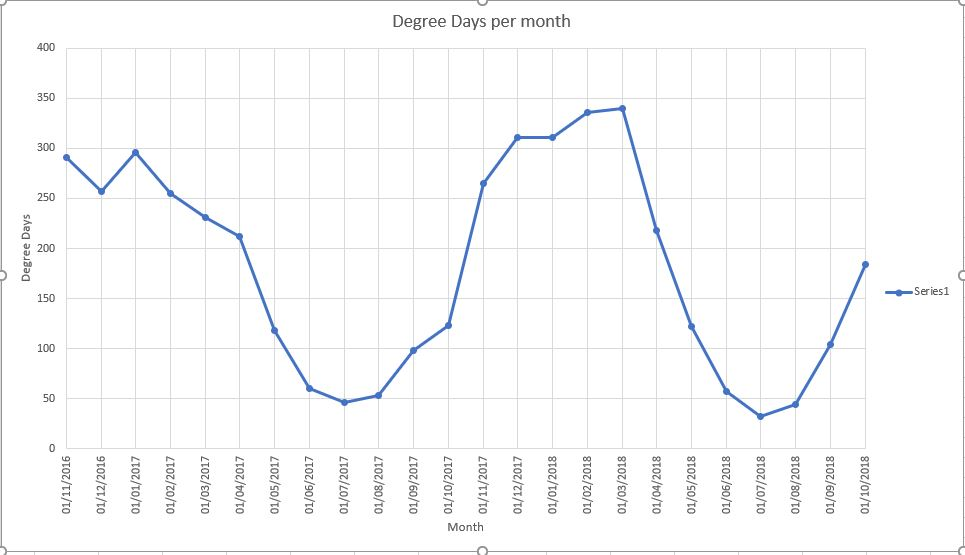

In [20]:
from IPython.display import Image 
Image(filename="Degree_Days.JPG", width=1000, height=1000)

# [4] See References: How to display images in jupyter notebook

# [5] See References: JPG image of Anscombe's Quartet Dataset